In [11]:
import numpy as np
import nibabel as nib
import itk
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm
from itkwidgets import compare, checkerboard, view

In [12]:
from matplotlib.gridspec import GridSpec
from skimage.util import compare_images

## Comparison of atlases

In [37]:
atlas_mni = itk.imread('MNITemplateAtlas/atlas.nii.gz', itk.F)
atlas_gen = itk.imread('generated_atlas.nii.gz', itk.F)

[]

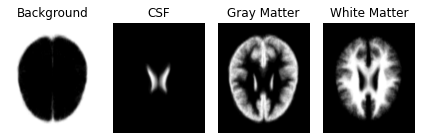

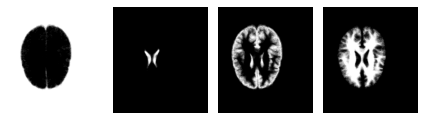

In [64]:
fig = plt.figure(figsize=(6, 24))
index = 95

ax0 = fig.add_subplot(1,4,1)
ax0.set_title('Background')
ax1 = fig.add_subplot(1,4,2)
ax1.set_title('CSF')
ax2 = fig.add_subplot(1,4,3)
ax2.set_title('Gray Matter')
ax3 = fig.add_subplot(1,4,4)
ax3.set_title('White Matter')

for label, a in enumerate([ax0, ax1, ax2, ax3]):
    a.imshow(atlas_mni[label, index,:,:], cmap='gray')
    a.axis('off')
plt.tight_layout()
plt.plot()


fig = plt.figure(figsize=(6, 24))
index = 145
ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)


for label, a in enumerate([ax0, ax1, ax3, ax2]):
    a.imshow(atlas_gen[label, index,:,:], cmap='gray')
    a.axis('off')
plt.tight_layout()
plt.plot()

## Visual comparison of different registration parameter 

In [13]:
parameter_object_affine = itk.ParameterObject.New()
parameter_object_affine.AddParameterFile( 'affine.txt')

parameter_object_elastix = itk.ParameterObject.New()
parameter_object_elastix.AddParameterFile( 'elastic.txt')

In [14]:
fixed_image = itk.imread('training-set/training-images/1000.nii', itk.F)
moving_image = itk.imread('training-set/training-images/1001.nii', itk.F)

##### Rigid (affine)

In [15]:
result_image, result_transform_parameters_affine = itk.elastix_registration_method(
fixed_image, moving_image,
parameter_object=parameter_object_affine,
log_to_console=False)


[]

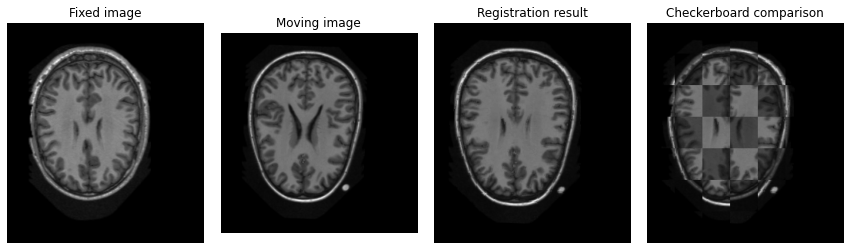

In [16]:
index = 150
reg_result = compare_images(fixed_image[index,:,:], result_image[index,:,:]*2, method='checkerboard', n_tiles=(7,7))

fig = plt.figure(figsize=(12, 48))


ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

ax0.imshow(fixed_image[index,:,:], cmap='gray')
ax0.set_title('Fixed image')
ax1.imshow(moving_image[index,:,:], cmap='gray')
ax1.set_title('Moving image')
ax2.imshow(result_image[index,:,:], cmap='gray')
ax2.set_title('Registration result')
ax3.imshow(reg_result, cmap='gray')
ax3.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()

##### Non-rigid (elastic)

In [17]:
result_image, result_transform_parameters_elastix = itk.elastix_registration_method(
fixed_image, moving_image,
parameter_object=parameter_object_elastix,
log_to_console=False)

[]

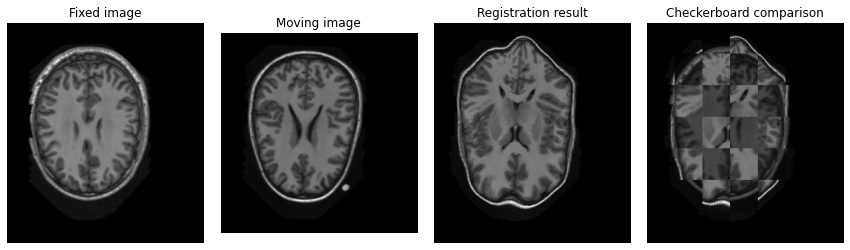

In [18]:
index = 150
reg_result = compare_images(fixed_image[index,:,:], result_image[index,:,:]*2, method='checkerboard', n_tiles=(7,7))

fig = plt.figure(figsize=(12, 48))


ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

ax0.imshow(fixed_image[index,:,:], cmap='gray')
ax0.set_title('Fixed image')
ax1.imshow(moving_image[index,:,:], cmap='gray')
ax1.set_title('Moving image')
ax2.imshow(result_image[index,:,:], cmap='gray')
ax2.set_title('Registration result')
ax3.imshow(reg_result, cmap='gray')
ax3.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()

##### Combined rigid and non-rigid

In [19]:

result_image_affine, result_transform_parameters_affine = itk.elastix_registration_method(
fixed_image, moving_image,
parameter_object=parameter_object_affine,
log_to_console=False)

result_image, result_transform_parameters_elastix = itk.elastix_registration_method(
fixed_image, result_image_affine,
parameter_object=parameter_object_elastix,
log_to_console=False)

[]

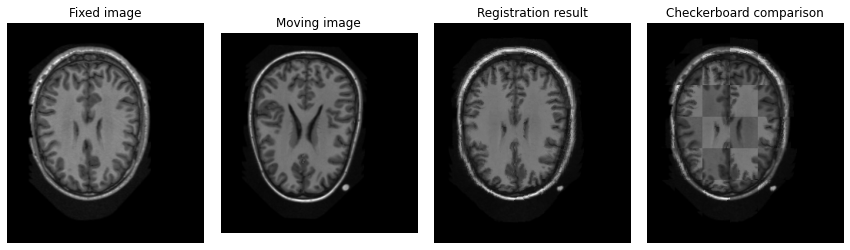

In [20]:
index = 150
reg_result = compare_images(fixed_image[index,:,:], result_image[index,:,:]*1.5, method='checkerboard', n_tiles=(7,7))

fig = plt.figure(figsize=(12, 48))


ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

ax0.imshow(fixed_image[index,:,:], cmap='gray')
ax0.set_title('Fixed image')
ax1.imshow(moving_image[index,:,:], cmap='gray')
ax1.set_title('Moving image')
ax2.imshow(result_image[index,:,:], cmap='gray')
ax2.set_title('Registration result')
ax3.imshow(reg_result, cmap='gray')
ax3.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()

## Atlas template registration to MNI

In [21]:
fixed_image = itk.imread('training-set/training-images/1001.nii', itk.F)

In [22]:
moving_image = itk.imread('MNITemplateAtlas/template.nii.gz', itk.F)

In [23]:
result_image_affine, result_transform_parameters_affine = itk.elastix_registration_method(
fixed_image, moving_image,
parameter_object=parameter_object_affine,
log_to_console=False)

result_image, result_transform_parameters_elastix = itk.elastix_registration_method(
fixed_image, result_image_affine,
parameter_object=parameter_object_elastix,
log_to_console=False)

[]

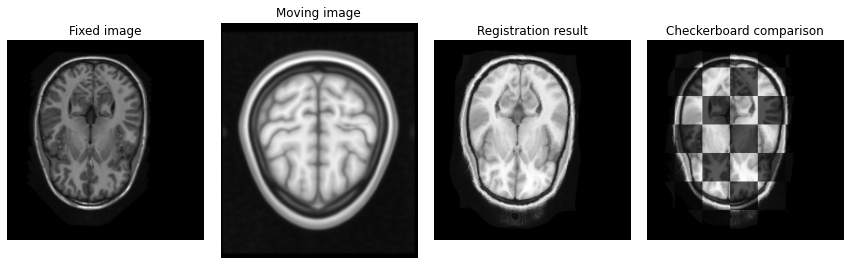

In [24]:
index = 130
reg_result = compare_images(fixed_image[index,:,:], result_image[index,:,:]/2, method='checkerboard', n_tiles=(7,7))

fig = plt.figure(figsize=(12, 48))


ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

ax0.imshow(fixed_image[index,:,:], cmap='gray')
ax0.set_title('Fixed image')
ax1.imshow(moving_image[index,:,:], cmap='gray')
ax1.set_title('Moving image')
ax2.imshow(result_image[index,:,:], cmap='gray')
ax2.set_title('Registration result')
ax3.imshow(reg_result, cmap='gray')
ax3.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()

## MNI Atlas transformation

In [25]:
moving_image_transformix = itk.imread('MNITemplateAtlas/atlas.nii.gz', itk.F)
moving_image_transformix = itk.array_from_image(moving_image_transformix)


s = fixed_image.shape
atlas_affine = np.empty((4, s[0], s[1],s[2]))
atlas_reg = np.empty((4, s[0], s[1],s[2]))

In [26]:
meta_data= dict(moving_image)
im = itk.image_from_array( moving_image_transformix[label])
for label in range(4):
        im = itk.image_from_array( moving_image_transformix[label])
        for key, value in meta_data.items():
            im[key] = value
        im = im.astype(itk.F)

        result_image_transformix_affine = itk.transformix_filter( im, result_transform_parameters_affine)
        atlas_affine[label] = result_image_transformix_affine
        atlas_reg[label] = itk.transformix_filter( result_image_transformix_affine, result_transform_parameters_elastix)

[]

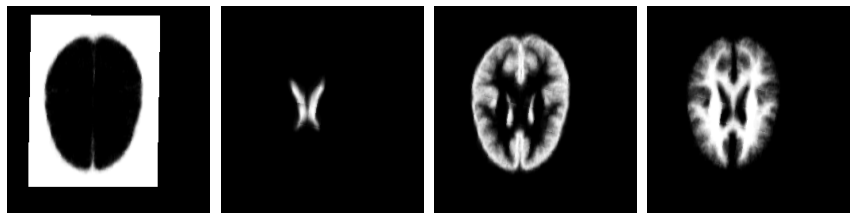

In [27]:
fig = plt.figure(figsize=(12, 48))
index = 150

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

for label, a in enumerate([ax0, ax1, ax2, ax3]):
    a.imshow(atlas_affine[label, index,:,:], cmap='gray')
    a.axis('off')
plt.tight_layout()
plt.plot()

## Atlas template registration to generated atlas on training images

In [28]:
fixed_image = itk.imread('training-set/training-images/1001.nii', itk.F)
moving_image = itk.imread('generated_template.nii.gz', itk.F)

In [29]:
result_image_affine, result_transform_parameters_affine = itk.elastix_registration_method(
fixed_image, moving_image,
parameter_object=parameter_object_affine,
log_to_console=False)

result_image, result_transform_parameters_elastix = itk.elastix_registration_method(
fixed_image, result_image_affine,
parameter_object=parameter_object_elastix,
log_to_console=False)

[]

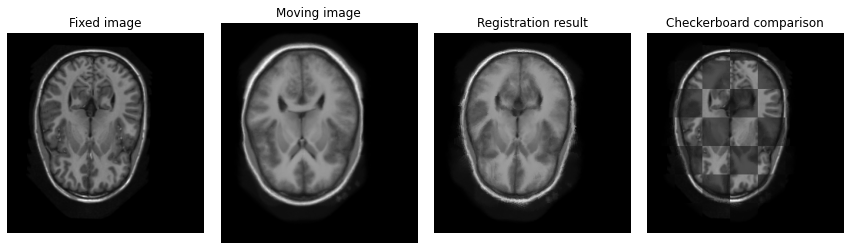

In [30]:
index = 130
reg_result = compare_images(fixed_image[index,:,:], result_image[index,:,:]/2, method='checkerboard', n_tiles=(7,7))

fig = plt.figure(figsize=(12, 48))


ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

ax0.imshow(fixed_image[index,:,:], cmap='gray')
ax0.set_title('Fixed image')
ax1.imshow(moving_image[index,:,:], cmap='gray')
ax1.set_title('Moving image')
ax2.imshow(result_image[index,:,:], cmap='gray')
ax2.set_title('Registration result')
ax3.imshow(reg_result, cmap='gray')
ax3.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2, ax3):
    a.axis('off')
plt.tight_layout()
plt.plot()

## Generated atlas transformation

In [31]:
moving_image_transformix = itk.imread('generated_atlas.nii.gz', itk.F)
moving_image_transformix = itk.array_from_image(moving_image_transformix)


s = fixed_image.shape
atlas_affine = np.empty((4, s[0], s[1],s[2]))
atlas_reg = np.empty((4, s[0], s[1],s[2]))

meta_data= dict(moving_image)
im = itk.image_from_array( moving_image_transformix[label])
for label in range(4):
        im = itk.image_from_array( moving_image_transformix[label])
        for key, value in meta_data.items():
            im[key] = value
        im = im.astype(itk.F)

        result_image_transformix_affine = itk.transformix_filter( im, result_transform_parameters_affine)
        atlas_affine[label] = result_image_transformix_affine
        atlas_reg[label] = itk.transformix_filter( result_image_transformix_affine, result_transform_parameters_elastix)

[]

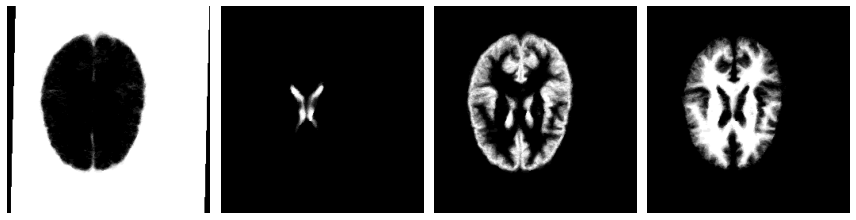

In [33]:
fig = plt.figure(figsize=(12, 48))
index = 150

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

for label, a in enumerate([ax0, ax1, ax3, ax2]):
    a.imshow(atlas_affine[label, index,:,:], cmap='gray')
    a.axis('off')
plt.tight_layout()
plt.plot()